# Inne biblioteki

# Statsmodels



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.ticker as tck
import matplotlib.cm as cm
import matplotlib.colors as clt

import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.datasets import co2

In [2]:
codata = co2.load().data
codata = codata.resample('M').mean().ffill()
diamonds = sns.load_dataset("diamonds")
iris = sns.load_dataset("iris")

Statsmodel to przede wszystkim narzędzie analityczne, podstawowymi narzędziami wizualizacji wyników. Posiada ograniczone możliwości formatowania wyników.

Są również narzędzia wizualizacji pozwalające na tworzenie bardziej złożonych wykresów.

https://www.statsmodels.org/dev/graphics.html

Przykład: dekompozycja serii czasowej

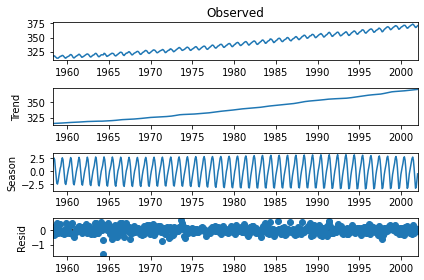

In [3]:
stl = STL(codata, seasonal=13)
res = stl.fit()
fig = res.plot()

In [20]:
ax = fig.axes[3]
ax.lines[1]
#ax.get_lines()[0]

Możliwości modyfikacji parametrów są ograniczone, ponieważ jest to Figura, zawierająca 4 wykresy (axes). Pozyskanie `artist` jest możliwe poprzez wydobycie `axes` i pobranie artist przez metodę `.get_lines()`. Można modyfikować parametry poprzez funkcję `setp`

[None]

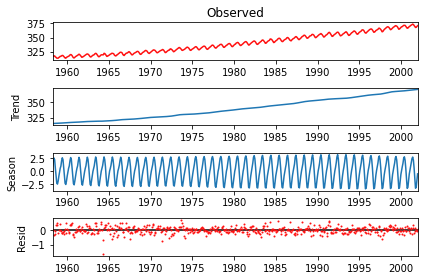

In [21]:
fig = res.plot()
plt.setp(fig.axes[0].get_lines()[0],color="#FF1111")
plt.setp(fig.axes[3].get_lines()[0],color="#FF1111")
plt.setp(fig.axes[3].get_lines()[0],markersize=1)

Alternatywą jest context manager (`with`), oznacza to jednak problemy z nadawaniem kolorów. To ostatnie wymaga zmiany `axes.cycler`. Zdecydowanie lepszym rozwiązaniem jest jednak wydobycie parametrów modelu statystycznego i zbudowanie własnego wizualizera/wykresu.

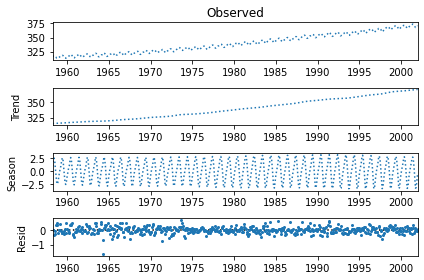

In [5]:
with matplotlib.rc_context({'lines.markersize': 2, 'scatter.marker':'x','lines.linestyle':':'}):
    fig = res.plot()

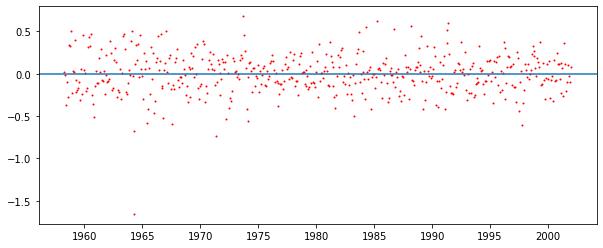

In [22]:
fig,ax = plt.subplots(figsize=(10,4))
ax.scatter(res.resid.index,res.resid,c='red',s=1)
ax.axhline(0)
# inne elementy wykresu

# Wykresy współwystępowania (koincydencji)

Są to wykresy pozwalające na prezentację zależności pomiedzy danymi kateogryzacyjnymi, jak często dana kategoria współwystępuje z inną. Modyfikacja parametrów jest złożona, wymaga zbudowania fukcji odwołującej się do słownika.

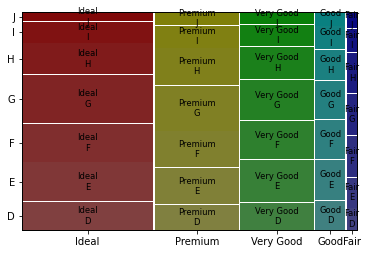

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
z = diamonds.groupby(["cut","color"]).count()
fig,dic = mosaic(z.carat)


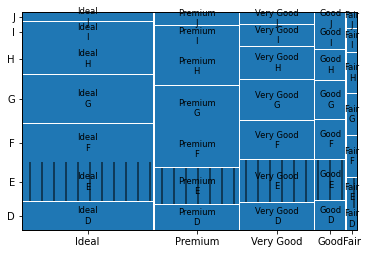

In [24]:
z = diamonds.groupby(["cut","color"]).count()
props = lambda key: {"hatch": "|" if key[1] == 'E' else ''}
fig,dic  = mosaic(z.carat,properties=props)

Modyfikacja takich wykresów wymaga dobrej znajomości struktury figury i wykresu. Dostęp do artists, które można modyfikawać przy pomocy `setp`

1. Dostęp do axes odbywa się przez właściwość `.axes`
2. Axes daje dostęp do patches (jednen z kontenerów przechowujących axes). Patches to tablica przechowująca kolejne `artists`.
3. Możemy modyfikować poszczególne elementy wykresu (głównie kolor).

Text(0.5, 1.0, 'Mozaika')

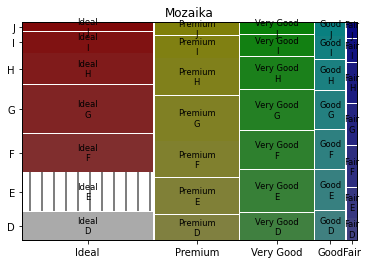

In [27]:
# pokazać jak to działa
fig,dic = mosaic(z.carat)
plt.setp(fig.axes[0].patches[0],color="#AAAAAA")
plt.setp(fig.axes[0].patches[1],fill=False,hatch="|",color="#000000")
fig.axes[0].set_title("Mozaika")

# Pandas 

pandas dostarcza dwa rodzaje wykresów:

- szybką wizualizację kolumn, metoda `.plot()`
- wizualizację danych wielowymiarowych (kilka metod)

Wszystkie wykresy metodą `.plot()` mają taką samą składnię.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

`pandas.plot()` zwraca axes. Dostęp do parametrów odbywa się przez różne metody i właściwości

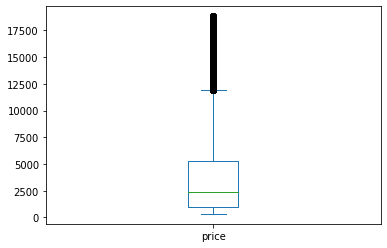

In [29]:
ax = diamonds.plot(kind="box",y="price")
ax.lines # linie
ax.patch # prostokąt

carat       AxesSubplot(0.125,0.125;0.0945122x0.755)
depth    AxesSubplot(0.238415,0.125;0.0945122x0.755)
table    AxesSubplot(0.351829,0.125;0.0945122x0.755)
price    AxesSubplot(0.465244,0.125;0.0945122x0.755)
x        AxesSubplot(0.578659,0.125;0.0945122x0.755)
y        AxesSubplot(0.692073,0.125;0.0945122x0.755)
z        AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

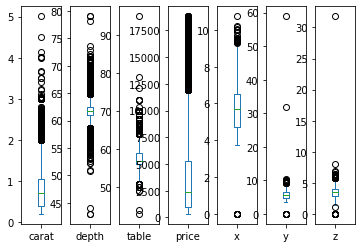

In [30]:
axes = diamonds.plot(kind="box",subplots=True) # z podziałem na axes
axes

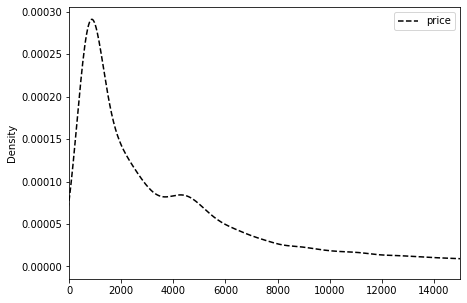

In [12]:
ax = diamonds.plot(kind="kde",y="price",figsize=(7,5),xlim=(0,15000),style="k--")
#ax.get_lines()

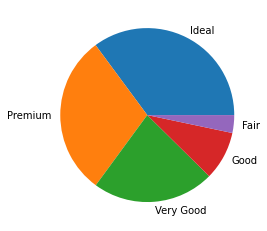

In [13]:
ax = diamonds.groupby("cut").sum().plot(kind="pie",y="price",legend=False,ylabel="") # wymaga wcześniejszego  pogrpowania

# Wykresy wielowymiarowe

- pairplot (scatter matrix)
- krzywe andrews i koordynaty równoległe
- rad_viz

In [31]:
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, autocorrelation_plot, radviz, boxplot

# Wykresy zależności między zmiennymi

Są dostępne własciwie w każdym pakiecie. W Pandas bardzo prosta obsługa. Formatowanie wymaga często nieoczywistych zmian. Przykład pokolorowanie kategorii na wykresie zależności

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

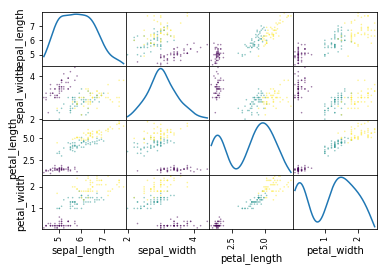

In [33]:
color_int = iris.species.astype('category').cat.codes # factor R
_ = scatter_matrix(iris,s=10,c=color_int,diagonal='kde') 

# Koordynaty równoległe

Jedna z najprostrzych i najbardziej skutecznych metod wizualizacji danych wielowymiarowych. Każdy z wymiarów jest porównywany wzdłuż pionowej osi. Nie nadaje się do dużej liczby wymiarów. 

https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html

<AxesSubplot:>

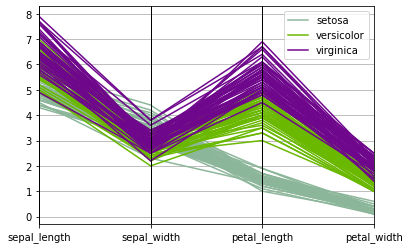

In [34]:
fig,ax = plt.subplots()
parallel_coordinates(iris,class_column="species",ax=ax)

Koordynaty równoległe wymagają standaryzacji, która nie jest dostępna w wersji oferowanej przez **pandas**.

<AxesSubplot:>

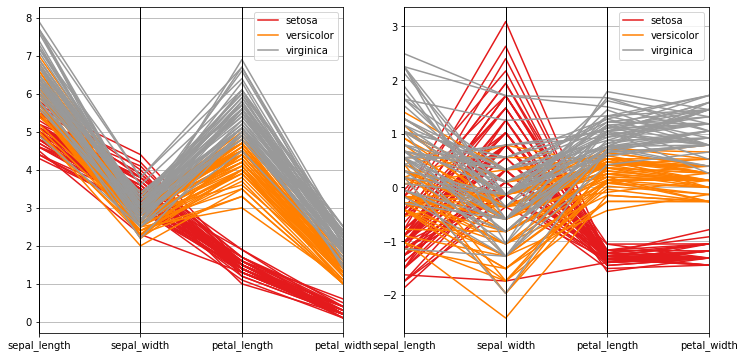

In [35]:
from sklearn.preprocessing import scale
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
iris_scaled = pd.DataFrame(scale(iris.iloc[:,:4].values),columns=iris.columns[:-1])
iris_scaled['species'] = iris['species']
parallel_coordinates(iris,class_column="species",colormap="Set1",ax=ax1)
parallel_coordinates(iris_scaled,class_column="species",colormap="Set1",ax=ax2)

# Krzywe Anrews'a

Rodzaj wykresu rzutujący wartości kolejnych na skończony szereg Fouriera. Wygładzona i ograniczona do jednolitego przedziału $[-\pi,\pi]$ wersja koordynat równoległych. Orginalny wykres zostanie zmofikowany w kanoniczny sposób. Wykres przyjmuje `axes` jako argument, co daje dostęp do jego wybranych parametrów.

https://pandas.pydata.org/docs/reference/api/pandas.plotting.andrews_curves.html

<AxesSubplot:>

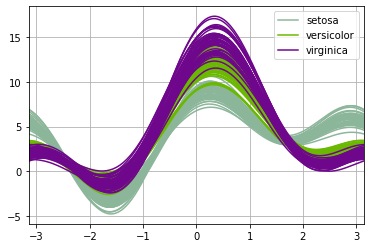

In [36]:
andrews_curves(iris,class_column="species")


Text(0.5, 1.0, 'Iris Andrews plot')

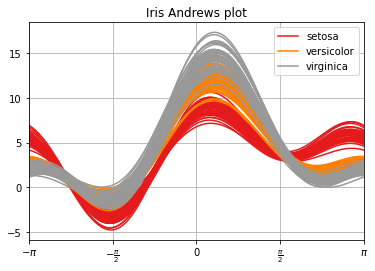

In [41]:
fig,ax = plt.subplots()
andrews_curves(iris,class_column="species",colormap="Set1",ax=ax)
_ = ax.xaxis.set_ticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),labels=('$-\pi$',r'$-\frac{\pi}{2}$','0',
                                                      r'$\frac{\pi}{2}$','$\pi$'))
ax.set_xlim(-np.pi,np.pi)
ax.set_title ("Iris Andrews plot")
#ax.set_grid_off()

# Wykresy radarowe

Kwestionowana metoda wizualizacji danych wymiarowych, gdyż jej wynik mocno zależy od kolejności zmiennych. Wykresy radarowe nie wymagają standaryzacji.

https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

<AxesSubplot:>

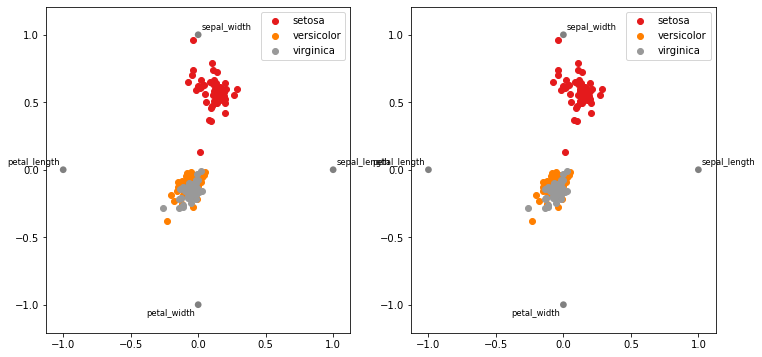

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
radviz(iris,class_column="species",colormap="Set1",ax=ax1)
radviz(iris_scaled,class_column="species",colormap="Set1",ax=ax2)

# Boxplot

Pandas w przypadku boxplot dostosowuje się do standardów matplotlib. `return_type` określa jaki obiekt ma zwracać funkcja: `axes` do modyfikacji obszaru wykresu lub `dict` do modyfikacji wykresów pudełkowych. Może też zwrócić oba. Zdecydowanie lepiej zwracać dict a axes tworzyć zewnętrznie

*Opowiedzieć o gca()*

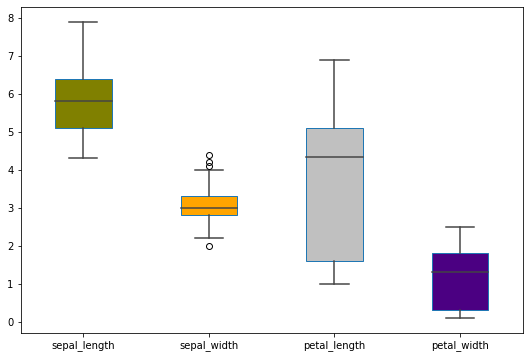

In [45]:
colorlist= ['olive','orange','silver','indigo']

fig,ax = plt.subplots(figsize=(9,6))
d = boxplot(iris,return_type='dict',patch_artist=True,ax=ax) # patch_artist=True aby można było tworzyć wypełnienie
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']: #Było na 2 zajęciach
     plt.setp(d[element], color="#444444",lw=1.5)
for patch,color in zip(d['boxes'],colorlist):
    patch.set(facecolor=color)
ax.grid(False)


# Yellowbrick

Yellowbrick to biblioteka napisana do wspomagania wizualizacji scikit-learn. Ma za zadanie połaczyć dopasowanie modelu, predykcję i wizualizację.  Jest opracowana w wyjątkowo dziwny sposób. Przykład gdzie dążenie do nadmiernego uproszaczania prowadzi do nieużywalności. Wymaga przygotowania danych w standardzie scikit-learn (X,y), gdzie y jest zmienną typu całkowitego

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from yellowbrick.features import Manifold, ParallelCoordinates
from yellowbrick.datasets import load_concrete

X = iris.iloc[:,:-1]
y = pd.Categorical(iris.iloc[:,-1]).codes
categories = iris.iloc[:,-1].unique()

# Koordynaty równoległe

Wymgaja wskazania kolumny kategoryzacyjnej jako y. Pozwalają również na autoamtyczną staandaryzację, co ciekawe przy pomocy kilku norm. 

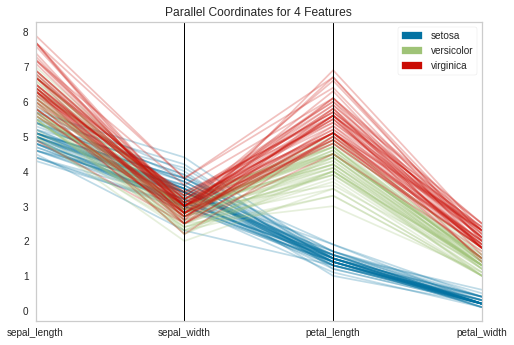

Text(0.5, 1.0, 'Tytuł')

In [49]:
viz = ParallelCoordinates()
viz.fit_transform(iris.iloc[:,:-1], iris.iloc[:,-1])
ax = viz.show()
ax.set_title("Tytuł")

Bardzo utrudniona współpraca z subplots(). W przypadku próby tworzenia zestawień wykresów, należy wywołać metodę `finalize()`, zamiast `show()`

Text(0.5, 1.0, 'Z normalizacją')

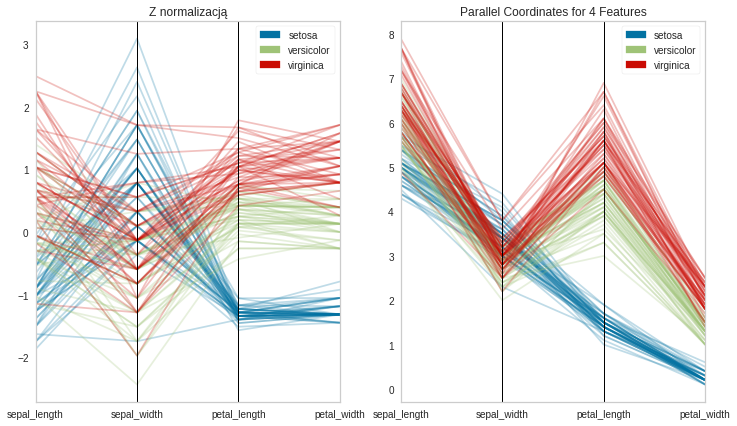

In [54]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,7))
viz1 = ParallelCoordinates(normalize='standard',ax=ax1)
viz1.fit_transform(iris.iloc[:,:-1], iris.iloc[:,-1])
viz2 = ParallelCoordinates(normalize=None,ax=ax2)
viz2.fit_transform(iris.iloc[:,:-1], iris.iloc[:,-1])
viz2.finalize() # wywołać finalize gdy stosujemy axes
viz1.finalize()
ax1.set_title("Z normalizacją")

# Transformacja wieloraka: Manifold

Transformacja wieloraka jest przykładem filozofii stosowanej w **yellowbrick** i jest stosowana do większości wizualizerów. W tym przypadku jednak wymagana jest kategoryzacja zmiennej y, w przeciwieństwie do `ParallelCoordinates`

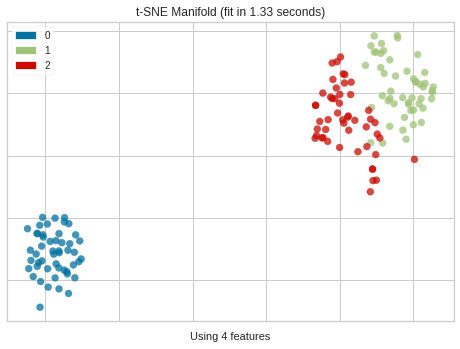

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 1.33 seconds)'}, xlabel='Using 4 features'>

In [25]:
viz = Manifold(manifold="tsne")
viz.fit_transform(X,y)
viz.show()

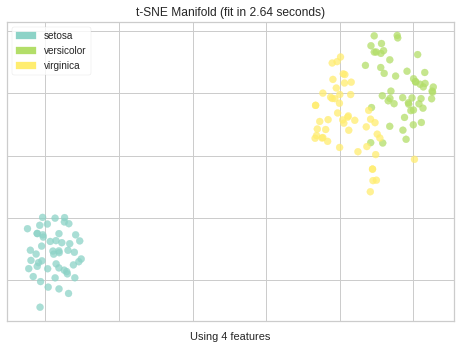

Text(0.5, 1.0, 'Title')

In [55]:
categories = iris.iloc[:,-1].unique() # było wcześniej
#categories = ["Stół","Wół","Nożyczki"] # jako kategorie musimy wiedzieć jakie są, można wpisać cokolwiek
viz = Manifold(manifold="tsne",classes=categories,colormap='Set3')
viz.fit_transform(X, y)
ax = viz.show() # wiz zwraca axes
ax.set_title("Title") # to nie zadziała!!!!

## Zmienna zależna zmiennoprzecinkowa

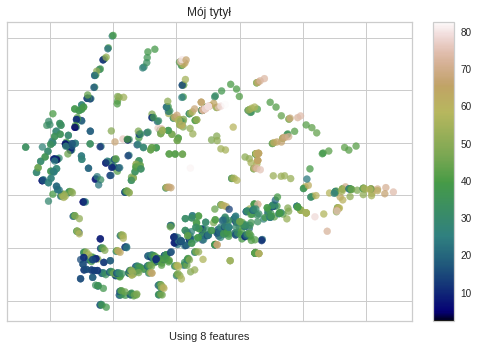

In [27]:
X, y = load_concrete()
viz = Manifold(manifold="isomap", n_neighbors=200,colormap="gist_earth",title="Mój tytył")
viz.fit_transform(X, y) 
_ = viz.show() 

Jeżeloi chcemy modyfikować parametry wszystkie wykresu należy stosować `finalize()` zamiast `show()`

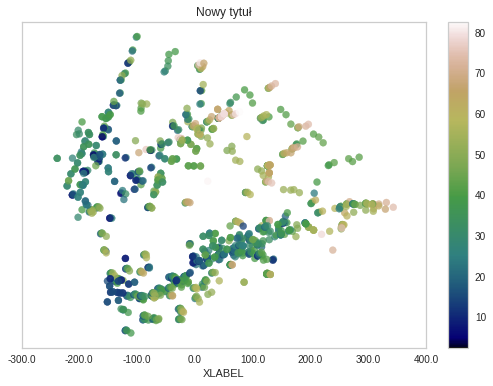

In [28]:
fig,ax=plt.subplots(figsize=(8,6))
viz = Manifold(manifold="isomap", n_neighbors=200,colormap="gist_earth",ax=ax)
viz.fit_transform(X, y)
viz.finalize() # nie stosować show a finalize
viz.ax.set_title("Nowy tytuł")
ticks = viz.ax.get_xticks()
viz.ax.set_xticks(ticks)
viz.ax.set_xticklabels(ticks)
viz.ax.set_xlabel("XLABEL")
viz.ax.grid(False)

# Diagram sylwetkowy

Jedna z popularniejszych metod wizualizacji skupień. Podobnie jak w innych rozwiązaniach **yellowbrick**. Można również zmieniać parametry poszczególnych elementów poprzez atrybut `.axes.collection`. Dotyczy to wszystkich typów wykresów niestandardowych, których treść nie jest tworzona poprzez wywołania standardowych geometrii (bar, plot, scatter) ale są tworzone jako kolekcje `aritsts`.

[None, None]

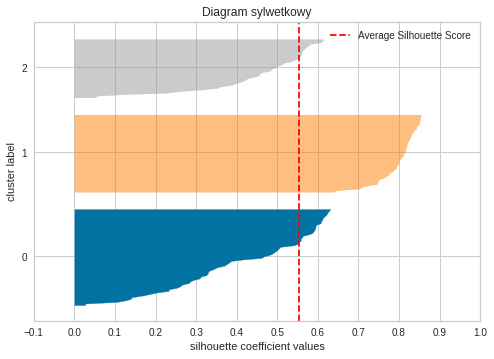

In [56]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=11)
viz = SilhouetteVisualizer(model, colors='Set1')
viz.fit(X)
viz.finalize()
viz.ax.set_title("Diagram sylwetkowy")
plt.setp(viz.ax.collections[0],color="b",alpha=1) # zmiana koloru

# Dendrogram

Dendrogram jest popularnym narzędziem wizualizacji hierarchicznej analizy skupień (AHC - agglomerative hierarhical clustering). Jest dostępny tylko w **scipy.cluster.heirarchy**. Jego formatowanie nie jest skomplikowane ale wymaga sięgnięcia do nieudokumentowanych funkcjonalności. Dendrogram jest tworzony jako kolekcja linii (collection), stąd dostęp do narzędzi formatowania jest bardzo ograniczony.

In [57]:
from scipy.cluster.hierarchy import dendrogram,linkage,set_link_color_palette
from scipy.spatial import distance as dst
import matplotlib
import os
import matplotlib.image as mpimg
import matplotlib.offsetbox as mpoff 

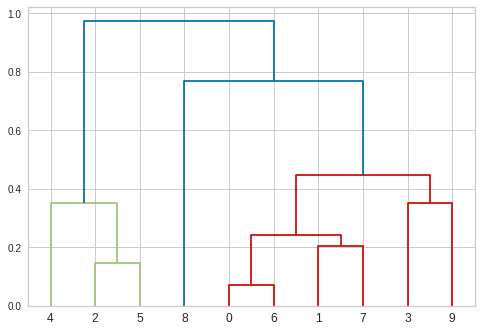

In [59]:
values = np.random.rand(10,2)
dist = dst.pdist(values)
link = linkage(dist,"ward")
_ = dendrogram(link) # zwraca złożony słownik który będzie bardzo przydatny

Dendrogram obsługuje `subplots()` i tym samym pozwala na dodawanie dodatkowych elementów

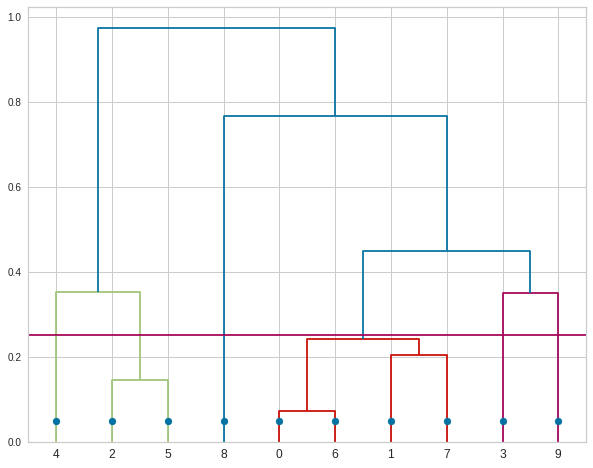

In [60]:
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,ax=ax,color_threshold=0.4)
ax.axhline(0.25,c='m')

sx= np.arange(10)*10+5 # położenie węzłów jest liczone w 10 nie jednostkach
sy = np.repeat(0.05,10)
_ = ax.scatter(sx,sy,zorder=100)

Ze względu na tworzenie dendrogramu przy pomocy kolekcji linii zastosowanie contextmanagera jest bardzo ograniczone. Modyfikacja kolorów jest możliwa przy pomocy funkcji pomocniczej `set_link_color_palette(colors)`, gdzie colors to po prostu lista kolorów. 

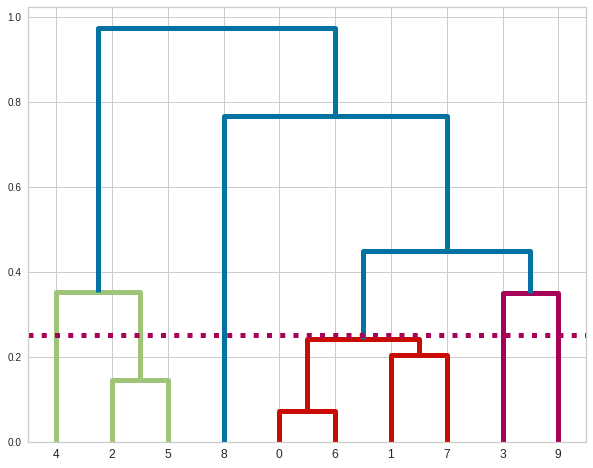

In [63]:
with matplotlib.rc_context({'lines.linewidth': 5,'lines.linestyle':':'}):
    fig,ax = plt.subplots(figsize=(10,8))
    dendr = dendrogram(link,color_threshold=0.4,ax=ax)
    ax.axhline(0.25,c='m')
    

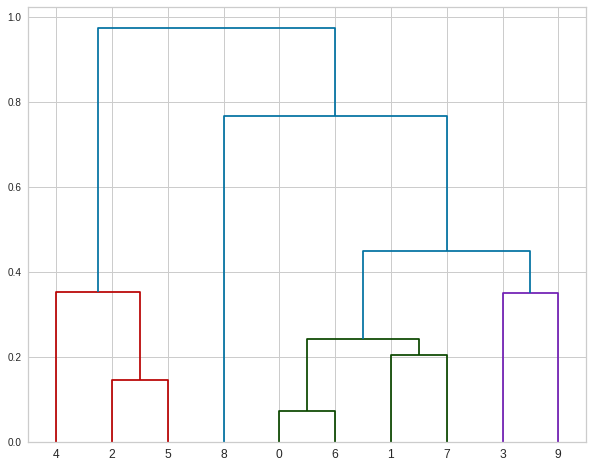

In [64]:
colors = ["#b90303","#0b4800","#711eb4"]
set_link_color_palette(colors)
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,color_threshold=0.4,ax=ax)


Poszczególne elementy dendrogramu można jednak modyfikawać z poziomu poszczególnych aritist w kolekcji/

[None, None]

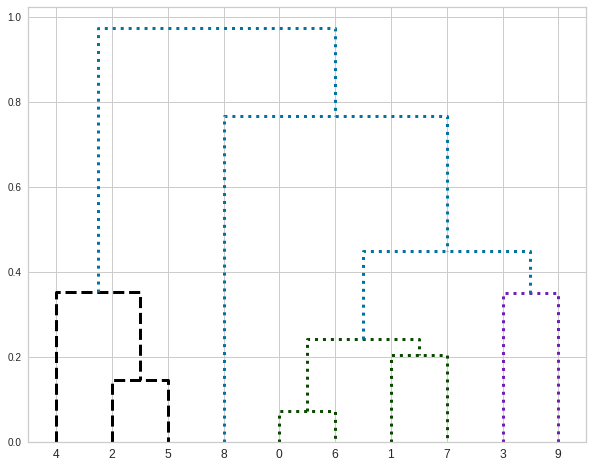

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,color_threshold=0.4,ax=ax)
plt.setp(ax.collections,linewidth=3,linestyle=":") # cała kolekcja
plt.setp(ax.collections[0],color="#000000",linestyle="--") # element kolekcji

Dendrogram, pdoobnie jak każdy inny wykres matplotlib umożliwia dodanie dowolnych etyiet. Wymagana jest jednak znajomość kolejności. Ta znaduje się w słowniku zwracanym przez funkcję `dendrogram`.

In [69]:
images = os.listdir("cyfry") # musimy posortować zgodnie z kolejnością grupowanych obiektów.
images.sort()
imarray = []
for image in images:
    imarray.append(mpimg.imread('cyfry/'+image))


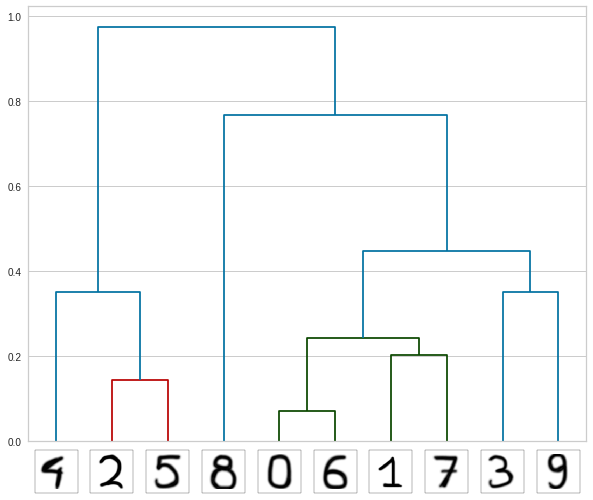

In [67]:
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,ax=ax,color_threshold=0.3,no_labels=True)

labels = dendr['leaves']

xcoord=5
for label in dendr['leaves']:
    oimg = mpoff.OffsetImage(imarray[label],zoom=0.35,interpolation='none',cmap='gist_gray')
    ab = mpoff.AnnotationBbox(oimg, xy=(xcoord,0), xybox=(0, -30), boxcoords="offset points")
    ax.add_artist(ab)
    xcoord+=10

# Treemap

Wykresy równoważne wykresom kołowym, ale przeznaczone do wizualizacji zbiorów hierarchicznych z dużą ilością elementów.

In [72]:
import squarify
import matplotlib.cm as cm
dfd = diamonds.groupby('cut').size().reset_index(name='counts')

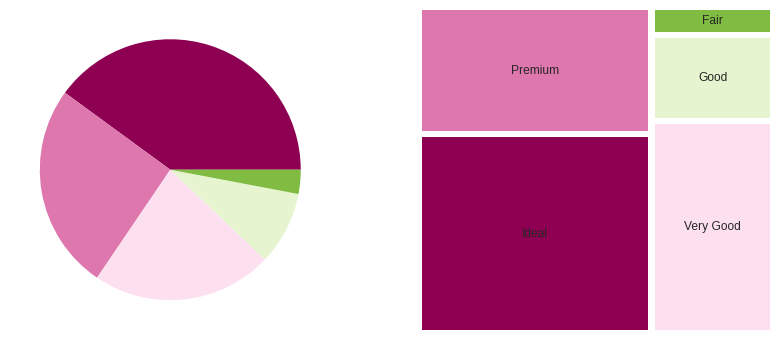

In [73]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))

p = ax1.pie(dfd.counts,colors=cm.PiYG(np.arange(0,1,0.2)))
s = squarify.plot(sizes=dfd.counts, label=dfd.cut,
                  color=cm.PiYG(np.arange(0,1,0.2)),pad=2,ax=ax2)
ax2.set_axis_off()

In [41]:
ax2.get_xlim()

(0.0, 100.0)

W praktyce treemap są narzędziem do dwuwymiarowej wizualizacji dendrogramów

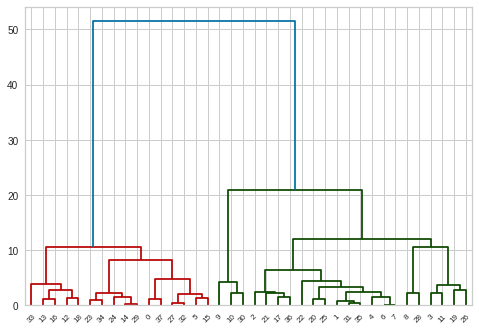

In [70]:
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
groupped = mpg.groupby("model").agg({'cty':'mean','hwy':'mean','model':'count'})
dist = dst.pdist(groupped)
link = linkage(dist,"ward")
d = dendrogram(link)

srtd = groupped.iloc[d['leaves']] #stortowanie

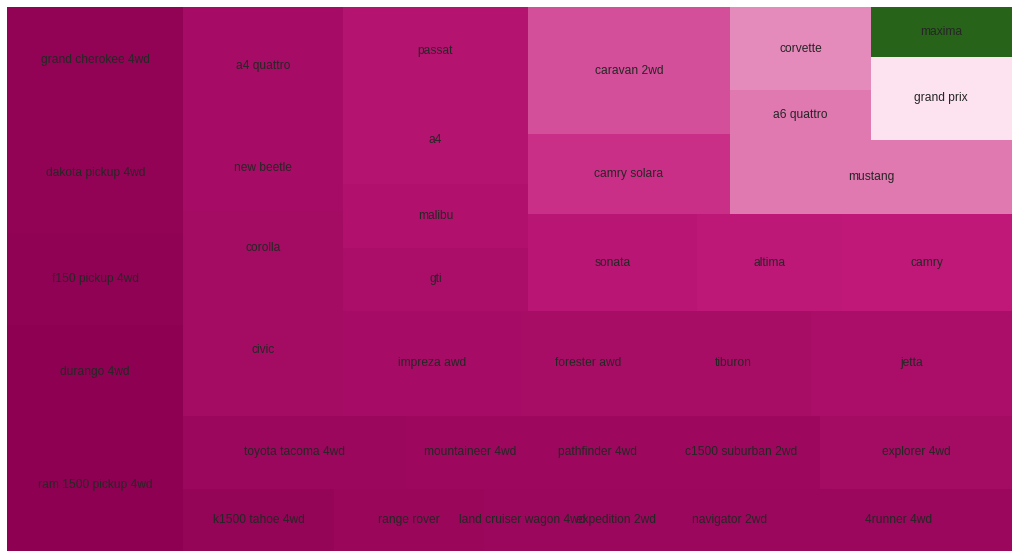

In [74]:
norm = clt.Normalize(0,link[:,2].max())
normed = norm(np.insert(link[:,2],0,0))
colors = cm.PiYG(normed)
fig,ax = plt.subplots(figsize=(18,10))
squarify.plot(sizes=srtd.model, label=srtd.index,color=colors,ax=ax)
ax.set_axis_off()

# Chmury tagów


Narzędzie do wizualizacji danych tekstowych.

https://amueller.github.io/word_cloud/

In [76]:

import wordcloud as wc
data = pd.read_excel("tags2ad.xlsx")
dc = dict(zip(data.key,data.value))


(-0.5, 1999.5, 999.5, -0.5)

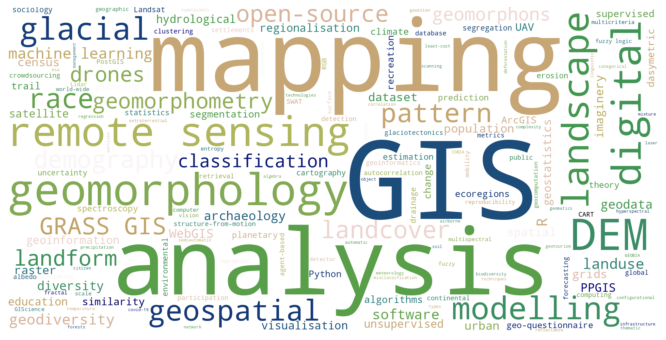

In [77]:
new_wc = wc.WordCloud(width=2000,height=1000,colormap='gist_earth')
c_cloud = new_wc.generate_from_frequencies(dc)
c_cloud.background_color='white'
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(c_cloud, interpolation='bilinear')
ax.axis("off")

In [78]:
svg = c_cloud.to_svg()

ptrs = open("cloud3.svg", "w")
n = ptrs.write(svg)
ptrs.close()

In [79]:
svg

'<svg xmlns="http://www.w3.org/2000/svg" width="2000" height="1000">\n<style>text{font-family:\'Droid Sans Mono\';font-weight:normal;font-style:normal;}</style>\n<rect width="100%" height="100%" style="fill:white"></rect>\n<text transform="translate(1030,651)" font-size="334" style="fill:rgb(28, 77, 122)">GIS</text>\n<text transform="translate(435,260)" font-size="303" style="fill:rgb(199, 166, 118)">mapping</text>\n<text transform="translate(322,882)" font-size="280" style="fill:rgb(89, 159, 74)">analysis</text>\n<text transform="translate(2,609)" font-size="134" style="fill:rgb(130, 169, 84)">geomorphology</text>\n<text transform="translate(1725,746)" font-size="133" style="fill:rgb(58, 140, 102)">DEM</text>\n<text transform="translate(2,428)" font-size="125" style="fill:rgb(175, 181, 92)">remote sensing</text>\n<text transform="translate(1941,553) rotate(-90)" font-size="122" style="fill:rgb(64, 148, 85)">digital</text>\n<text transform="translate(1781,621) rotate(-90)" font-size="1